# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models, regularizers
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random
import helper_functions

helper_functions.automatically_setup_repository()


removing training directory
removing testing directory
----CLEANUP COMPLETE----
generating training directory
generating testing directory
generating rotated directory
----DIRECTORIES GENERATED----
----ROTATED IMAGES GENERATED----
----SETS POPULATED----


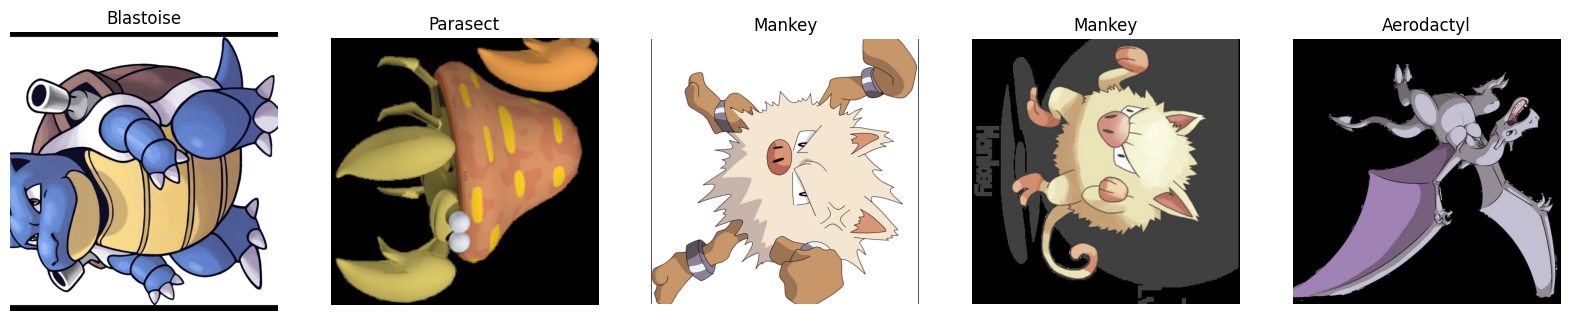

In [2]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [3]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)

print("Getting Training Photos")
#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")
# place training data into x and labels into y
y_train = np.array([poke_dict[x[0]] for x in dataset])
x_train = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_train, y_train))
random.shuffle(zipped)
x_train, y_train = zip(*zipped)
x_train, y_train = np.array(list(x_train)), np.array(list(y_train))

print("Getting Testing Photos")
dataset = []
for poke_folder in os.listdir(testing_directory):
    print(poke_folder, end=", ")
    for poke_img in os.listdir(testing_directory + '/' + poke_folder):
        img = resize_image(testing_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])
print("\nDone")

y_test = np.array([poke_dict[x[0]] for x in dataset])
x_test = np.array([x[1] for x in dataset])

# shuffle the lists with same order
zipped = list(zip(x_test, y_test))
random.shuffle(zipped)
x_test, y_test = zip(*zipped)
x_test, y_test = np.array(list(x_test)), np.array(list(y_test))

x_test = x_test / 255.0
x_train = x_train / 255.0

print("Reshapping")
# Flatten the image arrays for the MLP input
x_test = x_test.reshape(x_test.shape[0], -1)
x_train = x_train.reshape(x_train.shape[0], -1)
# split data into training and testing
# x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)
print("Done")

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)

print(f"Number of training data: {len(y_train)}")
print(f"Number of testing data: {len(y_test)}")



Getting Training Photos
Abra, Aerodactyl, Alakazam, Alolan Sandslash, Arbok, Arcanine, Articuno, Beedrill, Bellsprout, Blastoise, Bulbasaur, Butterfree, Caterpie, Chansey, Charizard, Charmander, Charmeleon, Clefable, Clefairy, Cloyster, Cubone, Dewgong, Diglett, Ditto, Dodrio, Doduo, Dragonair, Dragonite, Dratini, Drowzee, Dugtrio, Eevee, Ekans, Electabuzz, Electrode, Exeggcute, Exeggutor, Farfetchd, Fearow, Flareon, Gastly, Gengar, Geodude, Gloom, Golbat, Goldeen, Golduck, Golem, Graveler, Grimer, Growlithe, Gyarados, Haunter, Hitmonchan, Hitmonlee, Horsea, Hypno, Ivysaur, Jigglypuff, Jolteon, Jynx, Kabuto, Kabutops, Kadabra, Kakuna, Kangaskhan, Kingler, Koffing, Krabby, Lapras, Lickitung, Machamp, Machoke, Machop, Magikarp, Magmar, Magnemite, Magneton, Mankey, Marowak, Meowth, Metapod, Mew, Mewtwo, Moltres, MrMime, Muk, Nidoking, Nidoqueen, Nidorina, Nidorino, Ninetales, Oddish, Omanyte, Omastar, Onix, Paras, Parasect, Persian, Pidgeot, Pidgeotto, Pidgey, Pikachu, Pinsir, Poliwag, Po

In [4]:



model = models.Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))



model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(.01)))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        2

In [5]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, 
                    batch_size= 512,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/100


C:\Users\18862\OneDrive\Documents\github\Multi-Label-Pokemon-Classifier\venv\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 [==============================] - 60s 910ms/step - loss: 9.6827 - accuracy: 0.0630 - val_loss: 6.4250 - val_accuracy: 0.0343
Epoch 2/100
64/64 [==============================] - 57s 889ms/step - loss: 4.2319 - accuracy: 0.2321 - val_loss: 5.3901 - val_accuracy: 0.0658
Epoch 3/100
64/64 [==============================] - 57s 888ms/step - loss: 3.1913 - accuracy: 0.3826 - val_loss: 5.2225 - val_accuracy: 0.1148
Epoch 4/100
64/64 [==============================] - 57s 897ms/step - loss: 2.8391 - accuracy: 0.4910 - val_loss: 4.5243 - val_accuracy: 0.2101
Epoch 5/100
64/64 [==============================] - 57s 885ms/step - loss: 2.6867 - accuracy: 0.5808 - val_loss: 3.5660 - val_accuracy: 0.3992
Epoch 6/100
64/64 [==============================] - 57s 895ms/step - loss: 2.5150 - accuracy: 0.6488 - val_loss: 3.3165 - val_accuracy: 0.4937
Epoch 7/100
64/64 [==============================] - 57s 884ms/step - loss: 2.4662 - accuracy: 0.7029 - val_loss: 2.9542 - val_accuracy: 0.5924
Epoc

45/45 [==============================] - 1s 19ms/step


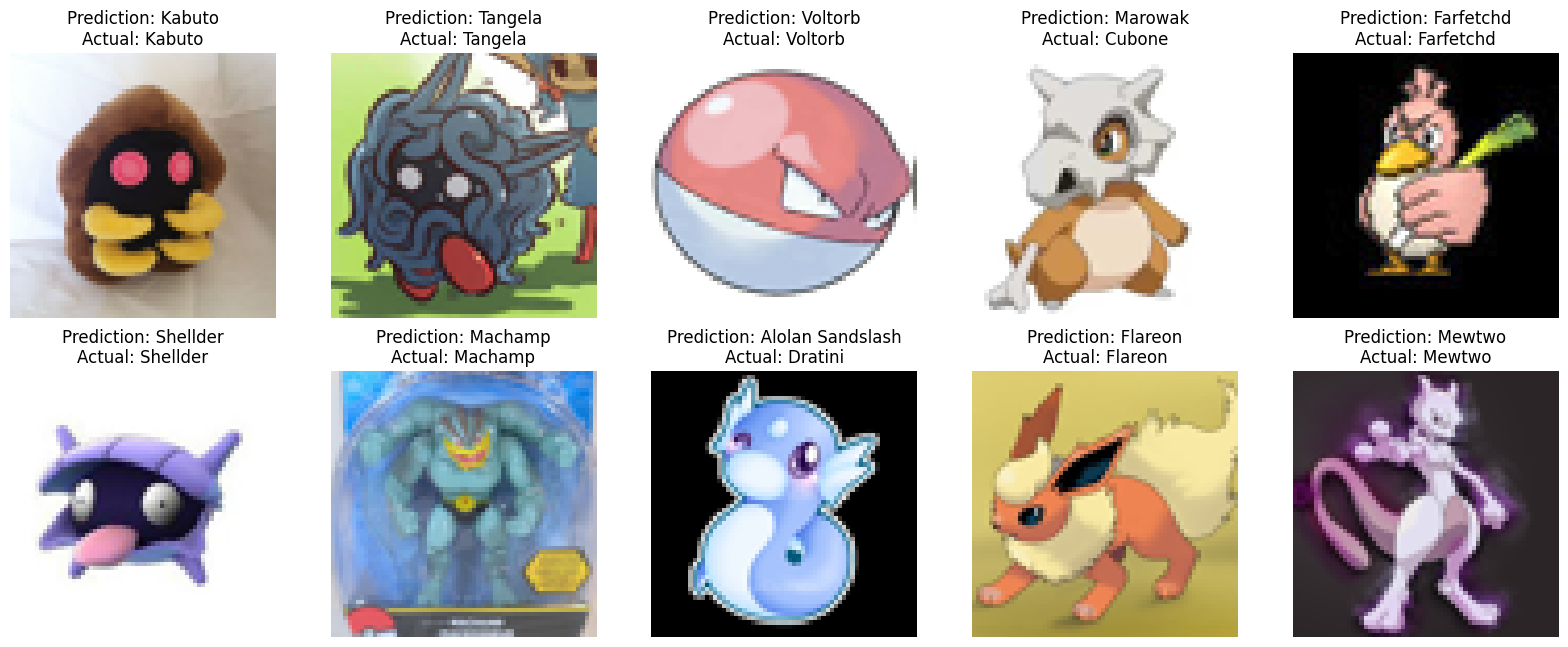

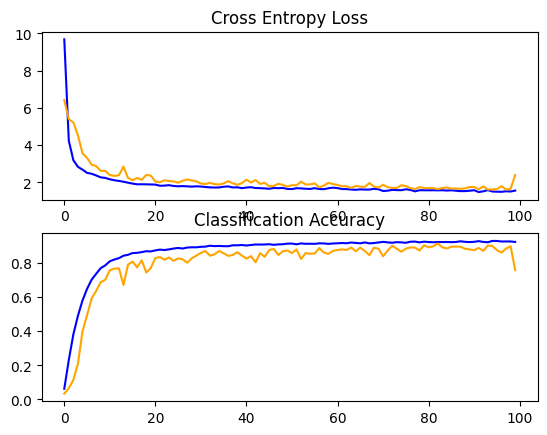

Accuracy for class: Abra         is 71.4 %
Accuracy for class: Aerodactyl   is 28.6 %
Accuracy for class: Alakazam     is 50.0 %
Accuracy for class: Alolan Sandslash is 100.0 %
Accuracy for class: Arbok        is 88.9 %
Accuracy for class: Arcanine     is 88.9 %
Accuracy for class: Articuno     is 55.6 %
Accuracy for class: Beedrill     is 100.0 %
Accuracy for class: Bellsprout   is 12.5 %
Accuracy for class: Blastoise    is 66.7 %
Accuracy for class: Bulbasaur    is 66.7 %
Accuracy for class: Butterfree   is 100.0 %
Accuracy for class: Caterpie     is 62.5 %
Accuracy for class: Chansey      is 77.8 %
Accuracy for class: Charizard    is 71.4 %
Accuracy for class: Charmander   is 90.9 %
Accuracy for class: Charmeleon   is 70.0 %
Accuracy for class: Clefable     is 100.0 %
Accuracy for class: Clefairy     is 60.0 %
Accuracy for class: Cloyster     is 80.0 %
Accuracy for class: Cubone       is 62.5 %
Accuracy for class: Dewgong      is 44.4 %
Accuracy for class: Diglett      is 37.5 %
Acc

In [6]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')



# Save the model

In [7]:
model.save('output/pokemon_classifier.keras')